**Задание 1**  
Импортируйте библиотеки pandas, numpy и matplotlib.  
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.   
Создайте датафреймы X и y из этих данных.  
  
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.  
  
Масштабируйте данные с помощью StandardScaler.  
  
Постройте модель TSNE на тренировочный данных с параметрами:  
n_components=2, learning_rate=250, random_state=42.  
  
Постройте диаграмму рассеяния на этих данных.  

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [5]:
target = boston.target

In [6]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
X = pd.DataFrame(data, columns=feature_names)

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
y = pd.DataFrame(target, columns=['Price'])

In [11]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [20]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [21]:
X_train_tsne.shape

(404, 2)

Text(0.5, 1.0, 't-SNE (Train)')

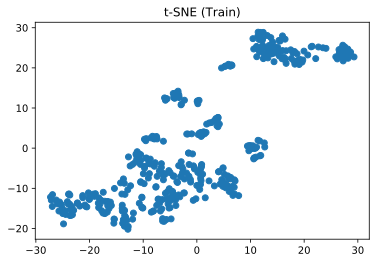

In [51]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('t-SNE (Train)')

**Задание 2**  
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.  
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.  
  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.  
  
Вычислите средние значения price и CRIM в разных кластерах.  

In [23]:
from sklearn.cluster import KMeans

In [24]:
knn = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [25]:
labels_train = knn.fit_predict(X_train_scaled)

In [26]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(0.5, 1.0, 't-SNE Clustered (Train)')

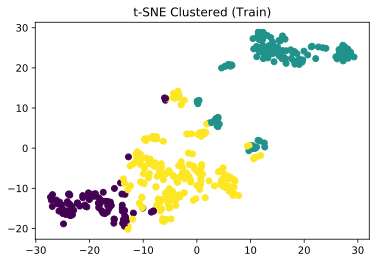

In [50]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title('t-SNE Clustered (Train)')

**ИЛИ**

Text(0.5, 1.0, 't-SNE Clustered (Train)')

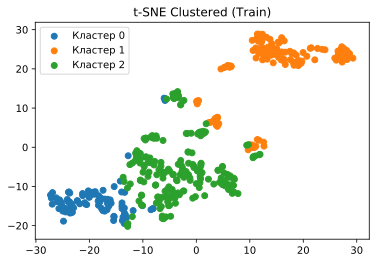

In [49]:
plt.scatter(X_train_tsne[labels_train==0, 0], X_train_tsne[labels_train==0, 1])
plt.scatter(X_train_tsne[labels_train==1, 0], X_train_tsne[labels_train==1, 1])
plt.scatter(X_train_tsne[labels_train==2, 0], X_train_tsne[labels_train==2, 1])
plt.legend(['Кластер 0','Кластер 1','Кластер 2'])
plt.title('t-SNE Clustered (Train)')

**Средняя цена (Price) по кластерам (train):**

In [29]:
y_train[labels_train==0].mean()

Price    27.788372
dtype: float64

In [30]:
y_train[labels_train==1].mean()

Price    16.165354
dtype: float64

In [31]:
y_train[labels_train==2].mean()

Price    24.958115
dtype: float64

**Средняя криминальная обстановка (CRIM) по кластерам (train):**

In [32]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [33]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [34]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

*** Задание 3**  
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.  
  
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [35]:
labels_test = knn.predict(X_test_scaled)

In [36]:
pd.value_counts(labels_test)

2    51
1    35
0    16
dtype: int64

In [43]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [44]:
X_test_tsne.shape

(102, 2)

Text(0.5, 1.0, 't-SNE (Test)')

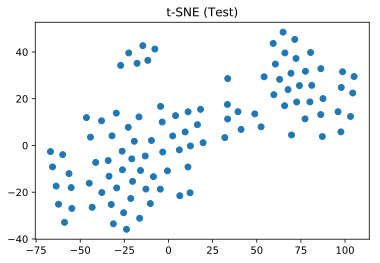

In [47]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.title('t-SNE (Test)')

Text(0.5, 1.0, 't-SNE Clustered (Test)')

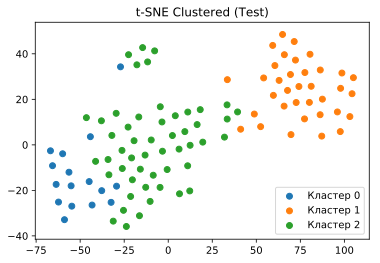

In [48]:
plt.scatter(X_test_tsne[labels_test==0, 0], X_test_tsne[labels_test==0, 1])
plt.scatter(X_test_tsne[labels_test==1, 0], X_test_tsne[labels_test==1, 1])
plt.scatter(X_test_tsne[labels_test==2, 0], X_test_tsne[labels_test==2, 1])
plt.legend(['Кластер 0','Кластер 1','Кластер 2'])
plt.title('t-SNE Clustered (Test)')

**Средняя цена (Price) по кластерам (test):**

In [37]:
y_test[labels_test==0].mean()

Price    31.35
dtype: float64

In [38]:
y_test[labels_test==1].mean()

Price    16.437143
dtype: float64

In [39]:
y_test[labels_test==2].mean()

Price    21.860784
dtype: float64

**Средняя криминальная обстановка (CRIM) по кластерам (test):**

In [40]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [41]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [42]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176